<a href="https://colab.research.google.com/github/bhagyasurendran/LGM-Data-Science-Internship/blob/main/Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lets Grow More VIRTUAL INTERNSHIP PROGRAM**

**Task 3**

**NAME : BHAGYA S**

**DATA SCIENCE INTERNSHIP**

**Stock Market Prediction And Forecasting Using Stacked LSTM**

**Dataset Link :**https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

**IMPORTING LIBRARIES**

In [32]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [33]:
stockset = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

**DISPLAYING FIRST 5 ROWS IN THE DATASET USING head()**

In [34]:
stockset.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**DISPLAYING FIRST 5 ROWS IN THE DATASET USING tail()**

In [35]:
stockset.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [36]:
stockset.shape

(2035, 8)

In [37]:
stockset.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [38]:
df=stockset.sort_values(by=["Date"])
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [39]:
df.reset_index(inplace=True)
df

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2034,2010-07-21,122.10,123.00,121.05,121.10,121.55,658666,803.56
1,2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17
2,2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
3,2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
4,2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
...,...,...,...,...,...,...,...,...,...
2030,4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
2031,3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2032,2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2033,1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95


In [40]:
df.describe()

,index,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,1017.000000,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,587.598219,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,0.000000,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,508.500000,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,1017.000000,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,1525.500000,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,2034.000000,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 2035 non-null   int64  
 1   Date                  2035 non-null   object 
 2   Open                  2035 non-null   float64
 3   High                  2035 non-null   float64
 4   Low                   2035 non-null   float64
 5   Last                  2035 non-null   float64
 6   Close                 2035 non-null   float64
 7   Total Trade Quantity  2035 non-null   int64  
 8   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(2), object(1)
memory usage: 143.2+ KB


**DATA VISUALIZATION**

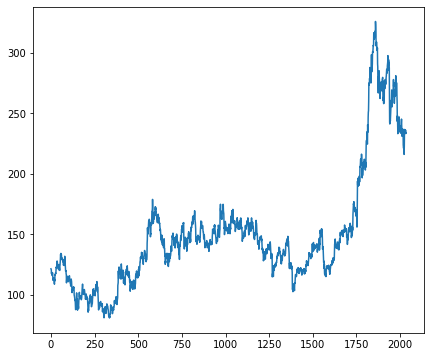

In [42]:
plt.figure(figsize=(7,6))
plt.plot(df["Close"])

In [43]:
df_close=df["Close"]
df_close

0       121.55
1       120.90
2       120.65
3       117.60
4       118.65
         ...  
2030    233.30
2031    236.10
2032    234.25
2033    233.25
2034    233.75
Name: Close, Length: 2035, dtype: float64

**DATA PREPROCESSING**

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(np.array(df_close).reshape(-1,1))
scaled_data

array([[0.16584967],
       [0.16319444],
       [0.1621732 ],
       ...,
       [0.62622549],
       [0.62214052],
       [0.62418301]])

**CREATING TRAINING AND TESTING DATA**

In [46]:
training_size = int(len(scaled_data)*0.70)
test_size=len(scaled_data) - training_size

train_data=scaled_data[0:training_size,:]
test_data=scaled_data[training_size:len(scaled_data),:1]

In [47]:
training_size,train_data

(1424, array([[0.16584967],
        [0.16319444],
        [0.1621732 ],
        ...,
        [0.15012255],
        [0.15747549],
        [0.15277778]]))

In [48]:
test_size,test_data

(611, array([[0.1621732 ],
        [0.15951797],
        [0.16707516],
        [0.15992647],
        [0.16053922],
        [0.16441993],
        [0.16687092],
        [0.1693219 ],
        [0.16074346],
        [0.15972222],
        [0.16401144],
        [0.15727124],
        [0.14705882],
        [0.14460784],
        [0.15175654],
        [0.15441176],
        [0.15216503],
        [0.14848856],
        [0.15522876],
        [0.15767974],
        [0.1621732 ],
        [0.16094771],
        [0.16339869],
        [0.15931373],
        [0.15972222],
        [0.16115196],
        [0.16666667],
        [0.15747549],
        [0.15379902],
        [0.14848856],
        [0.15114379],
        [0.1503268 ],
        [0.15155229],
        [0.15645425],
        [0.16033497],
        [0.1566585 ],
        [0.15686275],
        [0.17749183],
        [0.17973856],
        [0.1744281 ],
        [0.19281046],
        [0.18607026],
        [0.18811275],
        [0.18443627],
        [0.18280229],
     

**TRANSFORMING THE DATA FROM ARRAY TO A MATRIX**

In [49]:
def matrix(dataset,time_step= 1):
  dataX, dataY=[], []
  for i in range(len(dataset)-time_step-1):
      a = dataset[i: (i + time_step), 0]
      dataX.append(a)
      dataY.append(dataset[i + time_step,0])

  return np.array(dataX), np.array(dataY)

In [50]:
time_step = 100
x_train, y_train = matrix(train_data,time_step)
x_test, y_test =  matrix(test_data,time_step)

In [51]:
x_train.shape,x_test.shape

((1323, 100), (510, 100))

In [52]:
y_train.shape,y_test.shape

((1323,), (510,))

**RESHAPING THE DATA**

In [53]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

**CREATING LSTM MODEL**

In [54]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [55]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.fit(x_train, y_train, validation_split=0.1, epochs=60, batch_size=64, verbose=1)

Epoch 1/60
19/19 [==============================] - 11s 273ms/step - loss: 0.0088 - val_loss: 0.0034
Epoch 2/60
19/19 [==============================] - 4s 202ms/step - loss: 0.0020 - val_loss: 0.0015
Epoch 3/60
19/19 [==============================] - 4s 197ms/step - loss: 9.8570e-04 - val_loss: 0.0013
Epoch 4/60
19/19 [==============================] - 4s 197ms/step - loss: 8.9944e-04 - val_loss: 0.0012
Epoch 5/60
19/19 [==============================] - 4s 203ms/step - loss: 8.7647e-04 - val_loss: 0.0012
Epoch 6/60
19/19 [==============================] - 4s 197ms/step - loss: 8.7555e-04 - val_loss: 0.0012
Epoch 7/60
19/19 [==============================] - 4s 199ms/step - loss: 8.3492e-04 - val_loss: 0.0012
Epoch 8/60
19/19 [==============================] - 4s 199ms/step - loss: 8.1935e-04 - val_loss: 0.0011
Epoch 9/60
19/19 [==============================] - 4s 196ms/step - loss: 7.7356e-04 - val_loss: 9.9910e-04
Epoch 10/60
19/19 [==============================] - 4s 192ms/step 

In [57]:
test_predict = model.predict(x_test)

In [58]:
inverse_predict = scaler.inverse_transform(test_predict)
inverse_predict

array([[144.39853 ],
       [144.56728 ],
       [143.47284 ],
       [140.46333 ],
       [139.02419 ],
       [138.76001 ],
       [140.27051 ],
       [141.87106 ],
       [141.93428 ],
       [141.34991 ],
       [141.14882 ],
       [142.6709  ],
       [143.41481 ],
       [145.1037  ],
       [147.42442 ],
       [144.56372 ],
       [142.0339  ],
       [142.19205 ],
       [143.11032 ],
       [148.99509 ],
       [153.22333 ],
       [154.77242 ],
       [154.75932 ],
       [152.37082 ],
       [152.71846 ],
       [152.61668 ],
       [153.12244 ],
       [155.03416 ],
       [155.52676 ],
       [155.33693 ],
       [155.83115 ],
       [154.39293 ],
       [150.73094 ],
       [144.569   ],
       [141.58759 ],
       [141.0677  ],
       [141.3265  ],
       [140.1564  ],
       [137.4112  ],
       [133.40852 ],
       [131.1059  ],
       [130.20914 ],
       [127.93277 ],
       [127.24433 ],
       [124.96432 ],
       [122.14988 ],
       [121.76237 ],
       [121.6

**MEAN SQUARED ERROR**

In [59]:
from sklearn.metrics import mean_squared_error

In [60]:
mean_sqr_error = mean_squared_error(y_test, test_predict)
print("The Squared Error is:", mean_sqr_error)

The Squared Error is: 0.00046616812846835004


**THANK YOU**